# TASK1

In [84]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/4ML/MSA_nat_with_annotation.faa'
art_file_path = '/content/drive/MyDrive/4ML/MSA_art.faa'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np

# 定义标准氨基酸表
AMINO_ACIDS = "ACDEFGHIKLMNPQRSTVWY"
AMINO_MAP = {aa: i for i, aa in enumerate(AMINO_ACIDS)}

def parse_fasta(file_path):
    sequences = []
    labels = []
    current_seq = []
    current_label = None

    with open(file_path, "r") as f:
        for line in f:
            line = line.strip()
            if line.startswith(">"):  # Header line
                if current_seq and current_label is not None:
                    sequences.append("".join(current_seq))
                    labels.append(current_label)
                    current_seq = []

                # Extract label
                if "functional_true" in line:
                    current_label = 1.0
                elif "functional_false" in line:
                    current_label = 0.0
                else:
                    #raise ValueError(f"Unknown functional label in header: {line}")
                    current_label = 2.0
            else:
                # Sequence line
                current_seq.append(line)

        # Append the last sequence
        if current_seq and current_label is not None:
            sequences.append("".join(current_seq))
            labels.append(current_label)

    return sequences, labels

def one_hot_encode_sequence(sequence):
    """将蛋白质序列转换为独热编码"""
    one_hot = np.zeros((len(sequence), 20), dtype=int)
    for i, aa in enumerate(sequence):
        if aa in AMINO_MAP:
            one_hot[i, AMINO_MAP[aa]] = 1
    return one_hot

def process_fasta(file_path):
    sequences, labels = parse_fasta(file_path)
    encoded_sequences = [one_hot_encode_sequence(seq) for seq in sequences]
    return encoded_sequences, np.array(labels)


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # 输出所有结果
temp_se,temp_labels = process_fasta(art_file_path)
print(temp_se)


[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]]), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
   

# TASK2

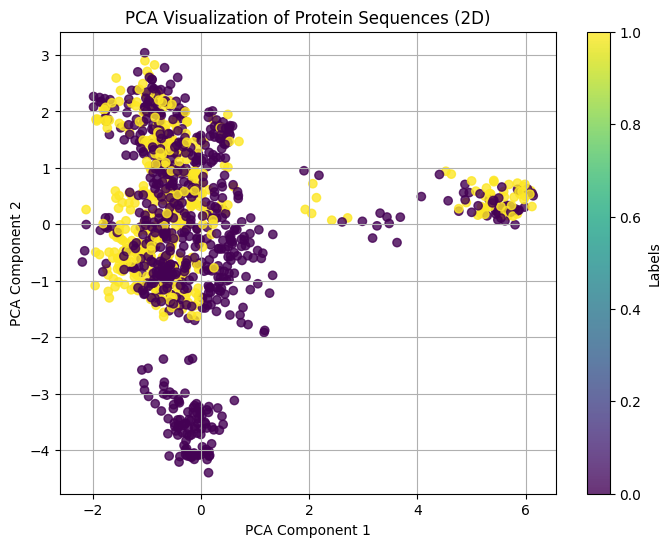

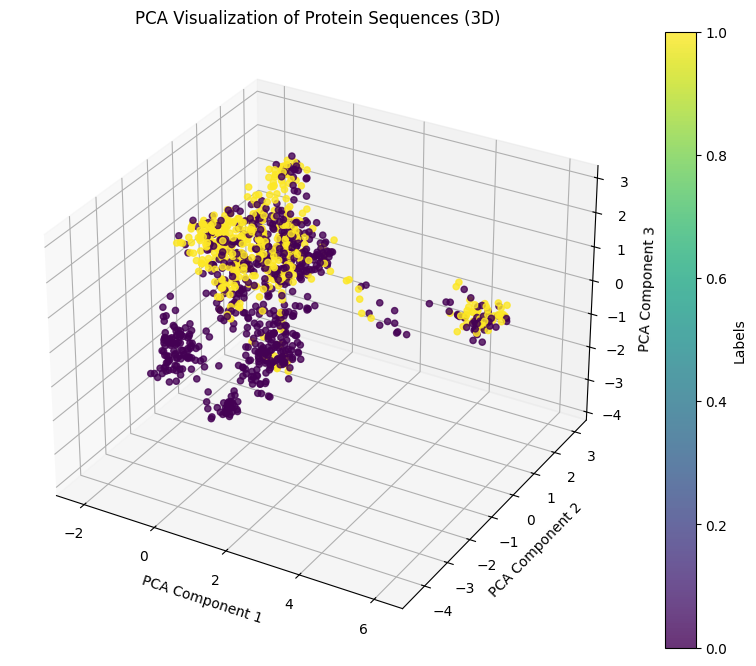

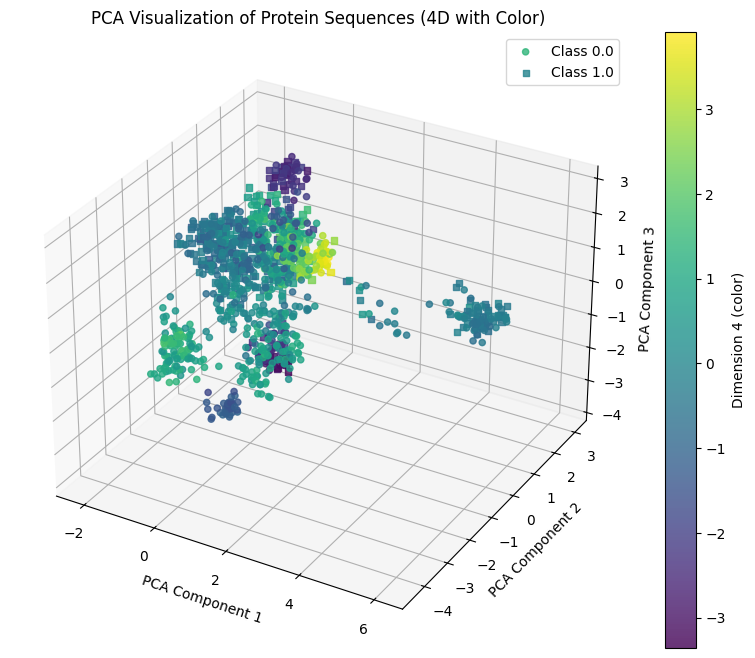

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def visualize_pca(data, labels, title="PCA Visualization"):
    """
    可视化 PCA 降维结果的函数。

    参数:
    - data: PCA 降维后的数据，形状为 (n_samples, n_components)，支持 2D 或更高维度
    - labels: 每个样本的类别标签，形状为 (n_samples,)
    - title: 图形标题（可选）
    """
    n_components = data.shape[1]
    unique_labels = np.unique(labels)
    markers = ['o', 's', '^', 'D', 'P', '*', 'X', 'h']  # 支持多类别的点形状
    if n_components == 2:
        # 二维可视化
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.8)
        plt.colorbar(scatter, label='Labels')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.title(f'{title} (2D)')
        plt.grid(True)
        plt.show()

    elif n_components == 3:
        # 三维可视化
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='viridis', alpha=0.8)
        fig.colorbar(scatter, label='Labels')
        ax.set_xlabel('PCA Component 1')
        ax.set_ylabel('PCA Component 2')
        ax.set_zlabel('PCA Component 3')
        ax.set_title(f'{title} (3D)')
        plt.show()
    elif n_components >= 4:
        # 四维可视化，使用颜色表示第 4 维，形状表示类别
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        for i, label in enumerate(unique_labels):
            idx = labels == label
            scatter = ax.scatter(data[idx, 0], data[idx, 1], data[idx, 2],
                                  c=data[idx, 3], cmap='viridis',
                                  marker=markers[i % len(markers)], alpha=0.8, label=f'Class {label}')
        cbar = fig.colorbar(scatter, ax=ax, label='Dimension 4 (color)')
        ax.set_xlabel('PCA Component 1')
        ax.set_ylabel('PCA Component 2')
        ax.set_zlabel('PCA Component 3')
        ax.set_title(f'{title} (4D with Color)')
        ax.legend()
        plt.show()
    else:
        print("PCA 降维结果必须至少有两维数据用于可视化。")

def Pca_visual(encoded_sequences, labels,components):
    """
    使用PCA进行降维并可视化序列数据。
    :param encoded_sequences: 独热编码后的序列
    :param labels: 对应的功能性标签 (0表示非功能性，1表示功能性)
    """
    # 将序列列表转换为二维数组 (样本数, 特征数)
    encoded_sequences = np.array(encoded_sequences).reshape(len(encoded_sequences), -1)

    # 使用PCA降维至3个主成分
    pca = PCA(n_components=components)
    pca_result = pca.fit_transform(encoded_sequences)
    visualize_pca(pca_result, labels, title="PCA Visualization of Protein Sequences")

# 读取FASTA文件、编码序列并进行PCA可视化
encoded_sequences, labels = process_fasta(file_path)
#pca_visualization(encoded_sequences, labels)
Pca_visual(encoded_sequences, labels,2)
Pca_visual(encoded_sequences, labels,3)
Pca_visual(encoded_sequences, labels,4)

<BarContainer object of 1130 artists>

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Explained Variance')

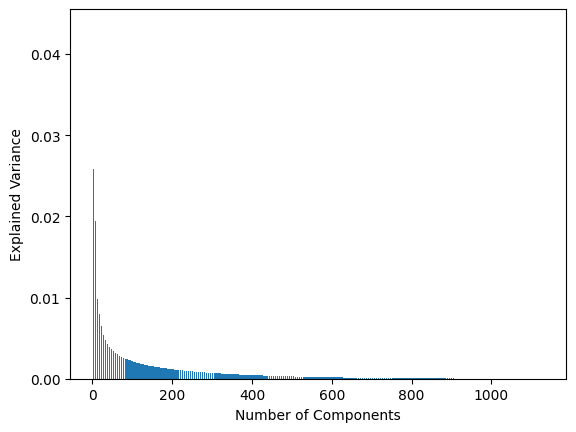

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Cumulative Explained Variance')

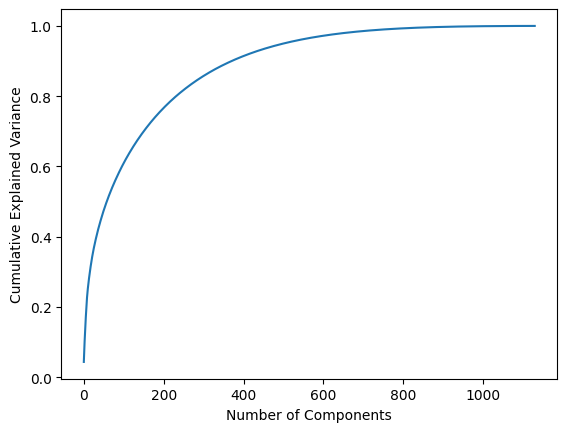

In [ ]:
# Fit PCA without specifying the number of components to compute variance ratios for all components
X = np.array(encoded_sequences).reshape(len(encoded_sequences), -1)
pca = PCA().fit(X)

# Plot the explained variance ratio for each principal component
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

# Plot the cumulative explained variance as a function of the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))  # Cumulative sum of explained variance
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# TASK3

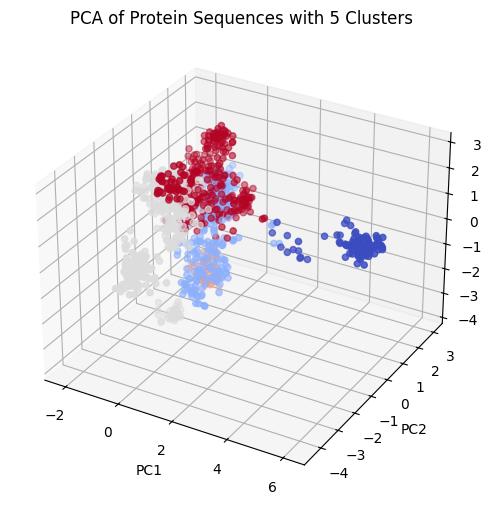

In [ ]:
from sklearn.cluster import KMeans
def pca_visualization_with_clusters(encoded_sequences, labels, n_clusters=2):
    """
    使用PCA进行降维、聚类并可视化结果。
    :param encoded_sequences: 独热编码后的序列
    :param labels: 功能性标签 (0表示非功能性，1表示功能性)
    :param n_clusters: 聚类数 (默认3个聚类)
    """
    # 将序列列表转换为二维数组 (样本数, 特征数)
    encoded_sequences = np.array(encoded_sequences).reshape(len(encoded_sequences), -1)

    # 使用PCA降维至20个主成分
    pca = PCA(n_components=600)
    pca_result = pca.fit_transform(encoded_sequences)

    # 使用KMeans聚类
    kmeans = KMeans(n_clusters=n_clusters,max_iter=2000000)
    cluster_labels = kmeans.fit_predict(pca_result)

    # 可视化PCA降维结果与聚类

    #根据聚类结果绘制数据点绘制三维图
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=cluster_labels, cmap='coolwarm')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.title('PCA Visualization of Protein Sequences')
    plt.title(f'PCA of Protein Sequences with {n_clusters} Clusters')
    plt.show()

encoded_sequences, labels = process_fasta(file_path)

pca_visualization_with_clusters(encoded_sequences, labels, n_clusters=5)

In [ ]:
#判断聚类的准确性，评判方法是把聚类结果映射到准确率最高的标签上
def evaluate_cluster_accuracy(true_labels, cluster_labels):
    """
    计算聚类结果的准确性。
    :param true_labels: 真实的标签
    :param cluster_labels: 聚类结果的标签
    :return: 聚类准确性
    """
    #标签从float转换为int
    true_labels = true_labels.astype(int)
    cluster_labels = cluster_labels.astype(int)
    # 计算每个聚类的主要标签
    cluster_mapping = {}
    for cluster in np.unique(cluster_labels):
        mask = cluster_labels == cluster
        counts = np.bincount(true_labels[mask])
        cluster_mapping[cluster] = np.argmax(counts)

    # 映射聚类标签到真实标签
    mapped_labels = np.array([cluster_mapping[label] for label in cluster_labels])

    # 计算准确性
    accuracy = np.mean(mapped_labels == true_labels)
    return accuracy
#生成聚类结果并评估准确性
encoded_sequences, labels = process_fasta(file_path)
encoded_sequences = np.array(encoded_sequences).reshape(len(encoded_sequences), -1)
pca = PCA(n_components=600)
pca_result = pca.fit_transform(encoded_sequences)
kmeans = KMeans(n_clusters=2,max_iter=2000000)
cluster_labels = kmeans.fit_predict(pca_result)
print(cluster_labels)
print(cluster_labels.shape)
accuracy = evaluate_cluster_accuracy(labels, cluster_labels)
print(f"Cluster accuracy: {accuracy:.2f}")

[1 1 0 ... 0 0 0]
(1130,)
Cluster accuracy: 0.63


# TASK4

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.nn.functional as F


class ProteinClassifier(nn.Module):
    def __init__(self, input_dim):
        super(ProteinClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 8)
        self.fc4 = nn.Linear(8, 1)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc4(x))
        return x

def GetAndSavePCAAndScalerData(encoded_sequences,n_components=50):
    """
    对独热编码后的序列进行PCA降维。
    :param encoded_sequences: 独热编码后的序列，可能是三维数组
    :param n_components: PCA降维的目标维度
    :return: 降维后的序列
    """
    # 确保输入是一个 NumPy 数组
    encoded_sequences = np.array(encoded_sequences)
    # 如果是三维数据，则将其展平为二维
    if len(encoded_sequences.shape) == 3:
        batch_size, seq_length, feature_dim = encoded_sequences.shape
        encoded_sequences = encoded_sequences.reshape(batch_size, seq_length * feature_dim)
    #归一化数据，使得数据的均值为0，方差为
    scaler1 = StandardScaler()
    sequences_scaled = scaler1.fit_transform(encoded_sequences)
    # PCA降维
    pca = PCA(n_components=n_components)
    sequences_pca = pca.fit_transform(sequences_scaled)
    #再次进行归一化
    scaler2 = StandardScaler()
    sequences_pca = scaler2.fit_transform(sequences_pca)
    return scaler1,scaler2,pca
def apply_pca(encoded_sequences,scaler1,scaler2,pca):
    """
    对独热编码后的序列进行PCA降维。
    :param encoded_sequences: 独热编码后的序列，可能是三维数组
    :param n_components: PCA降维的目标维度
    :return: 降维后的序列
    """
    # 确保输入是一个 NumPy 数组
    encoded_sequences = np.array(encoded_sequences)

    # 如果是三维数据，则将其展平为二维
    if len(encoded_sequences.shape) == 3:
        batch_size, seq_length, feature_dim = encoded_sequences.shape
        encoded_sequences = encoded_sequences.reshape(batch_size, seq_length * feature_dim)

    #归一化数据，使得数据的均值为0，方差为
    sequences_scaled = scaler1.transform(encoded_sequences)
    # PCA降维
    sequences_pca = pca.transform(sequences_scaled)
    #再次进行归一化
    sequences_pca = scaler2.transform(sequences_pca)
    return sequences_pca


def prepare_data(train_data, test_data, use_pca=True, n_components=20):
    """
    根据是否使用PCA降维，准备训练和测试数据，转换为PyTorch的Tensor。
    """
    if use_pca:
        scaler1,scaler2,pca = GetAndSavePCAAndScalerData(train_data[0],n_components)
        X_train = apply_pca(train_data[0],scaler1,scaler2,pca)
        X_test = apply_pca(test_data[0],scaler1,scaler2,pca)
    else:
        X_train = train_data[0]
        X_test = test_data[0]

    # 转换为Tensor格式
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(train_data[1], dtype=torch.float32).view(-1, 1)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(test_data[1], dtype=torch.float32).view(-1, 1)

    return X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor


def train_model(model, train_loader, criterion, optimizer, device, num_epochs=20):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # 前向传播
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # 反向传播 + 优化
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')


def test_model(model, X_input, device):
    model.eval()
    y_pred = []

    with torch.no_grad():
        for inputs in X_input:
            inputs = inputs.to(device)
            outputs = model(inputs)
            predictions = (outputs > 0.5).float()
            y_pred.extend(predictions.cpu().numpy())

    return  y_pred



In [ ]:

train_data = process_fasta(file_path)
test_data = process_fasta(art_file_path)

X_train, y_train, X_test, y_test = prepare_data(train_data, test_data, use_pca=True, n_components=40)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

input_dim = X_train.shape[1]
model = ProteinClassifier(input_dim)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.BCELoss()  # 二分类交叉熵损失
#class_weights = torch.tensor([1.0, 2.0], dtype=torch.float32).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# 训练模型
train_model(model, train_loader, criterion, optimizer, device, num_epochs=200)

ProteinClassifier(
  (fc1): Linear(in_features=40, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

Epoch [1/200], Loss: 0.6677
Epoch [2/200], Loss: 0.6643
Epoch [3/200], Loss: 0.6612
Epoch [4/200], Loss: 0.6561
Epoch [5/200], Loss: 0.6583
Epoch [6/200], Loss: 0.6504
Epoch [7/200], Loss: 0.6500
Epoch [8/200], Loss: 0.6441
Epoch [9/200], Loss: 0.6371
Epoch [10/200], Loss: 0.6300
Epoch [11/200], Loss: 0.6206
Epoch [12/200], Loss: 0.6092
Epoch [13/200], Loss: 0.6049
Epoch [14/200], Loss: 0.5903
Epoch [15/200], Loss: 0.5825
Epoch [16/200], Loss: 0.5652
Epoch [17/200], Loss: 0.5543
Epoch [18/200], Loss: 0.5486
Epoch [19/200], Loss: 0.5348
Epoch [20/200], Loss: 0.5334
Epoch [21/200], Loss: 0.5219
Epoch [22/200], Loss: 0.5027
Epoch [23/200], Loss: 0.5092
Epoch [24/200], Loss: 0.5105
Epoch [25/200], Loss: 0.4921
Epoch [26/200], Loss: 0.4791
Epoch [27/200], Loss: 0.4856
Epoch [28/200], Loss: 0.4802
Epoch [29/200], Loss: 0.4785
Epoch [30/200], Loss: 0.4773
Epoch [31/200], Loss: 0.4687
Epoch [32/200], Loss: 0.4762
Epoch [33/200], Loss: 0.4539
Epoch [34/200], Loss: 0.4630
Epoch [35/200], Loss: 0

[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0,

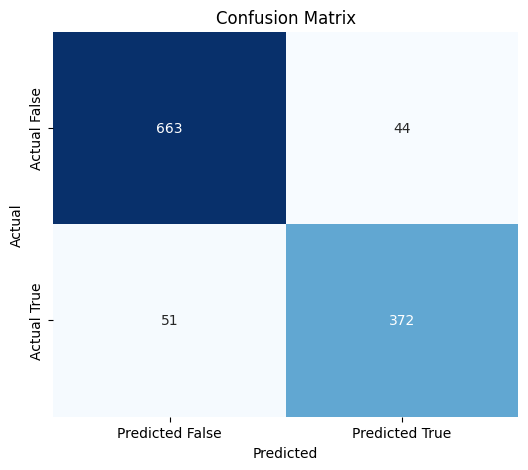

In [85]:
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
def evaluate_model(y_true, y_pred):
    """
    评估模型效果，输出混淆矩阵并提取 TP, FP, TN, FN
    :param y_true: 真实标签
    :param y_pred: 预测标签
    :return: None
    """
    # 计算混淆矩阵
    #y_true = y_true.to(device)
    #y_pred = y_pred.to(device)
    cm = confusion_matrix(y_true, y_pred)

    # 提取 TP, FP, TN, FN
    TN, FP, FN, TP = cm.ravel()

    # 输出混淆矩阵
    print("Confusion Matrix:")
    print(cm)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"True Positive (TP): {TP}")
    print(f"False Positive (FP): {FP}")
    print(f"True Negative (TN): {TN}")
    print(f"False Negative (FN): {FN}")

    # 可视化混淆矩阵
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted False', 'Predicted True'],
                yticklabels=['Actual False', 'Actual True'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
# 测试模型
y_pred = test_model(model, X_train, device)
print(y_pred)
# 将 PyTorch 张量转换为 NumPy 数组
y_true = y_train.cpu().numpy().flatten()  # 使用 flatten() 转换为一维数组
evaluate_model(y_true, y_pred)

# TASK5

In [ ]:
import torch
import os
# 定义氨基酸字母表和映射
AMINO_ACID_ALPHABET = 'ACDEFGHIKLMNPQRSTVWY-'  # 20个标准氨基酸
AA_TO_IDX = {aa: i for i, aa in enumerate(AMINO_ACID_ALPHABET)}  # 字符到索引的映射
IDX_TO_AA = {i: aa for i, aa in enumerate(AMINO_ACID_ALPHABET)}  # 索引到字符的映射
END_IDX = len(AMINO_ACID_ALPHABET)  # 结束符的特殊索引
ALL_IDX = list(AA_TO_IDX.values()) + [END_IDX]  # 包含结束符的索引

# 读取并处理蛋白质序列
def load_protein_data(file_path):
    sequences = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for i in range(0, len(lines), 2):  # 每两个行一组
            sequence = lines[i + 1].strip()  # 获取蛋白质序列
            # 合并多行蛋白质序列（处理换行符）
            full_sequence = ''.join(sequence.split())  # 移除所有换行符
            sequences.append(full_sequence)
    return sequences

# 将氨基酸序列转换为模型输入的张量
def amino_acid_to_tensor(sequence):
    """将氨基酸序列转换为模型输入的张量"""
    tensor = torch.tensor([AA_TO_IDX.get(aa, END_IDX) for aa in sequence])  # 如果是 gap 使用 END_IDX
    return tensor.unsqueeze(0)  # 返回一个 batch 的维度

# 加载并处理数据
protein_sequences = load_protein_data(art_file_path)

# 将所有蛋白质序列转换为张量
sequence_tensors = [amino_acid_to_tensor(seq) for seq in protein_sequences]



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# 定义生成器（Generator）模型
class ProteinSequenceGenerator(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, max_seq_len):
        super(ProteinSequenceGenerator, self).__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)  # 输入维度和嵌入维度
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)  # 输出为氨基酸的数量（包括结束符）

        self.max_seq_len = max_seq_len  # 生成序列的最大长度

    def forward(self, x):
        x = self.embedding(x)  # 将输入序列映射到低维空间
        lstm_out, _ = self.lstm(x)  # lstm_out shape: [batch_size, seq_len, hidden_dim]
        out = self.fc(lstm_out)  # out shape: [batch_size, seq_len, output_dim]
        return out

    def generate_sequence(self, seed, max_seq_len):
        """
        生成蛋白质序列
        seed: 初始输入（通常是一个随机的氨基酸索引）
        max_seq_len: 生成序列的最大长度
        """
        with torch.no_grad():
            self.eval()
            generated_sequence = seed  # 初始种子
            for _ in range(max_seq_len - seed.size(1)):  # 生成最大序列长度
                output = self.forward(generated_sequence)
                next_idx = torch.argmax(output[:, -1, :], dim=-1)  # 选择概率最大的氨基酸
                next_one_hot = torch.zeros(generated_sequence.size(0), 1, len(ALL_IDX)).scatter_(2, next_idx.unsqueeze(-1).unsqueeze(1), 1)

                # 调整维度使得可以拼接
                generated_sequence = generated_sequence.unsqueeze(2)  # 将 generated_sequence 扩展为三维张量 [batch_size, seq_len, 1]
                generated_sequence = torch.cat((generated_sequence, next_one_hot), dim=1)  # 在序列的末尾拼接 next_one_hot

                # 如果生成的序列包含了 END_IDX，则停止生成
                if next_idx.item() == END_IDX:
                    break

            return generated_sequence

# 定义判别器（Discriminator）模型
class ProteinSequenceDiscriminator(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim):
        super(ProteinSequenceDiscriminator, self).__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)  # 输入维度和嵌入维度
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)  # 输出为真假判断

    def forward(self, x):
        x = self.embedding(x)  # 将输入序列映射到低维空间
        lstm_out, _ = self.lstm(x)  # lstm_out shape: [batch_size, seq_len, hidden_dim]
        out = self.fc(lstm_out[:, -1, :])  # 只取最后一层输出进行分类
        return torch.sigmoid(out)

# 定义生成器和判别器的优化器和损失函数
generator = ProteinSequenceGenerator(len(ALL_IDX), embedding_dim=64, hidden_dim=128, output_dim=len(ALL_IDX), max_seq_len=100)
discriminator = ProteinSequenceDiscriminator(len(ALL_IDX), embedding_dim=64, hidden_dim=128)

criterion = nn.BCELoss()  # 二元交叉熵损失
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# 生成一个种子序列并将其转换为张量
def amino_acid_to_tensor(sequence):
    """将氨基酸序列转换为模型输入的张量"""
    tensor = torch.tensor([AA_TO_IDX.get(aa, END_IDX) for aa in sequence])  # 如果是 gap 使用 END_IDX
    return tensor.unsqueeze(0)  # 返回一个 batch 的维度

# 训练生成器和判别器
for epoch in range(10000):
    # 生成真实数据（用一些实际的蛋白质序列）
    real_sequence = amino_acid_to_tensor("M" * 100)  # 示例的真实序列，假设有 100 个氨基酸
    batch_size = real_sequence.size(0)

    # 生成假的数据（使用生成器）
    noise = torch.randint(0, len(ALL_IDX), (batch_size, 100)).long()  # 随机噪声，种子为随机索引
    fake_sequence = generator.generate_sequence(noise, max_seq_len=100)

    # 判别器训练
    optimizer_D.zero_grad()

    real_output = discriminator(real_sequence)
    fake_output = discriminator(fake_sequence.detach())  # 不计算梯度

    real_label = torch.ones(batch_size, 1)
    fake_label = torch.zeros(batch_size, 1)

    real_loss = criterion(real_output, real_label)
    fake_loss = criterion(fake_output, fake_label)
    d_loss = real_loss + fake_loss
    d_loss.backward()
    optimizer_D.step()

    # 生成器训练
    optimizer_G.zero_grad()

    output = discriminator(fake_sequence)
    g_loss = criterion(output, real_label)  # 目标是让生成的序列被判别器判为真实
    g_loss.backward()
    optimizer_G.step()

    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/10000], D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")

# 生成一个蛋白质序列
noise = torch.randint(0, len(ALL_IDX), (1, 96)).long()  # 随机生成一个种子
generated_sequence = generator.generate_sequence(noise, max_seq_len=96)

# 将生成的张量转换回氨基酸序列
def tensor_to_amino_acid(tensor):
    return ''.join([IDX_TO_AA[idx.item()] if idx.item() < len(AMINO_ACID_ALPHABET) else '-' for idx in tensor.squeeze()])

generated_protein_sequence = tensor_to_amino_acid(generated_sequence)
print(f"Generated Protein Sequence: {generated_protein_sequence}")

Epoch [0/10000], D Loss: 1.5784778594970703, G Loss: 0.7020188570022583
Epoch [100/10000], D Loss: 0.1331413835287094, G Loss: 2.305662155151367
Epoch [200/10000], D Loss: 0.02072855830192566, G Loss: 4.52839994430542
Epoch [300/10000], D Loss: 0.010976738296449184, G Loss: 5.224862098693848
Epoch [400/10000], D Loss: 0.006233668886125088, G Loss: 5.985733985900879
Epoch [500/10000], D Loss: 0.005433065351098776, G Loss: 5.909392833709717
Epoch [600/10000], D Loss: 0.0037232153117656708, G Loss: 6.41564416885376
Epoch [700/10000], D Loss: 0.0026407658588141203, G Loss: 6.929014682769775
Epoch [800/10000], D Loss: 0.0021453811787068844, G Loss: 7.152963161468506
Epoch [900/10000], D Loss: 0.0017788882832974195, G Loss: 7.351105213165283
Epoch [1000/10000], D Loss: 0.0015602558851242065, G Loss: 7.42752742767334
Epoch [1100/10000], D Loss: 0.0014688154915347695, G Loss: 7.356284141540527
Epoch [1200/10000], D Loss: 0.001161862863227725, G Loss: 7.72709846496582
Epoch [1300/10000], D Loss

In [ ]:
noise = torch.randint(0, len(ALL_IDX), (1, 96)).long()  # 随机生成一个种子
generated_sequence = generator.generate_sequence(noise, max_seq_len=96)

# 将生成的张量转换回氨基酸序列
def tensor_to_amino_acid(tensor):
    return ''.join([IDX_TO_AA[idx.item()] if idx.item() < len(AMINO_ACID_ALPHABET) else '-' for idx in tensor.squeeze()])
generated_protein_sequence = tensor_to_amino_acid(generated_sequence)
print(f"Generated Protein Sequence: {generated_protein_sequence}")
#生成一系列蛋白质序列，存储到Generated,faa文件中
generated_list = []
for i in range(1000):
    noise = torch.randint(0, len(ALL_IDX), (1, 96)).long()  # 随机生成一个种子
    generated_sequence = generator.generate_sequence(noise, max_seq_len=96)
    generated_protein_sequence = tensor_to_amino_acid(generated_sequence)
    generated_list.append(generated_protein_sequence)


Generated Protein Sequence: YRTISTLEEIADLMM-CTQD-YDGVAQGVDDACCV-QLI-FTGHKMTNCNHMW-YPTF-CSCRHELATEFCAGRPSEEAQRFFQT-SF-NPPRQ-A


In [ ]:
# 检验是否是功能序列
generateddata = [one_hot_encode_sequence(seq) for seq in generated_list]
temp = np.array([0])
generateddata = [generateddata,temp]
X_generated,_,_,_ = prepare_data(generateddata, generateddata, use_pca=True, n_components=40)
print(X_generated.shape)
# 生成数据的预测
y_generated = test_model(model, X_generated,device)
print(y_generated)

torch.Size([1000, 40])
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0